# Final Exam ENGR 492
**Author:** Andre Cox

**Student ID:** 95076758

## Design Problem 
Design Problem, determine the shape of a vertical bar that will
experience a uniform axial stress, or an axial stress that increases by 2 percent, 3 percent, 5
percent, or 10 percent along its length, when the bar is hanging under its own weight and an axial
force P.

The bar has a varying cross-sectional area A(x), where:
- x = 0 is the bottom of the bar
- x = L is the top attachment
- A(x) is the unknown shape you must determine

You must evaluate the following stress distributions:
1. Uniform axial stress
2. Stress increasing by 2 percent from bottom to top
3. Stress increasing by 3 percent
4. Stress increasing by 5 percent
5. Stress increasing by 10 percent

Next, approximate the bar using disk elements. Use the following numbers of disks to investigate
how the numerical resolution affects the solution:
- 2 disks
- 10 disks
- 20 disks
- 100 disks
- 150 disks
- 500 disks

## Model Inputs
- P = 1000 N
- ρ = 8000 kg/m^3
- g = 9.81 m/s^2
- t = 0.2 m (thickness)
- W(0) = 0.5 m (width of the bar at x = 0)
- L = 1 m (bar length)

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Specify Constants and Inputs

In [2]:
P_applied_force = 1000 # Applied force in Newtons
p_density = 8000 # Density in kg/m^3
g_gravity = 9.81 # Gravity in m/s^2
w0_initial_width = 0.5 # Initial width in meters
t0_initial_thickness = 0.2 # Initial thickness in meters
L_length = 1.0 # Length in meters

### Create helper functions 
Create some helpers for area and stress

In [3]:
# these are python lambda functions they allow for quick one line functions
stress_from_area = lambda P, A: P / A
analytical_area = lambda x, A0, density, g, P: A0 * np.exp((A0* density * g * x) / P)

### Solving steps idea

1. Compute the stress profile along the length of the bar based on alpha
2. Compute area based on the applied force and the stress at that position
3. Determine the weight of the disk at the current position
4. Update forces based on the weight of the disk
5. Loop back to step 2 until the end of the bar

### I create a function that computes the area distribution for a given number of section
This solves the problem using the steps outlined above where alpha is the percent increase in stress from bottom to top

In [4]:
def compute_tapered_rod(P_applied_force, p_density, g_gravity, w0_initial_width, t0_initial_thickness, L_length, sections, alpha):
    dx = L_length / sections # length of each section
    x_positions = np.linspace(0, L_length, sections) # Positions along the rod

    forces = np.zeros(sections) # List to store forces at each section
    forces[0] = P_applied_force # Initial force at the bottom
    # Lists created to store weights and areas of each section
    disk_weights = np.zeros(sections)
    areas = np.zeros(sections)

    # Step 1. Compute reference stress profile
    areas[0] = w0_initial_width * t0_initial_thickness # initial area at bottom
    reference_stress = stress_from_area(P_applied_force, areas[0]) * (1 + alpha * x_positions / L_length)  # reference stress profile over sections

    for i in range(sections):
        # Step 2. Compute area
        areas[i] = forces[i] / reference_stress[i] # compute area at position i

        # Step 3. 
        weight = p_density * g_gravity * areas[i] * dx # compute weight of disk at position i
        disk_weights[i] = weight # store weight at position i

        # since forces is i + 1 we stop one before the end
        if i < sections - 1:
            # Step 4. Update force for next section
            forces[i + 1] = forces[i] + weight # update force for next section
            # Step 5. Loop continues until the end of the bar


    return x_positions, areas, disk_weights


Just print the outputs of the function to see if they make sense

In [5]:
x_positions, areas, disk_weights = compute_tapered_rod(
    P_applied_force,
    p_density,
    g_gravity,
    w0_initial_width,
    t0_initial_thickness,
    L_length,
    10,
    0
)

print(x_positions)
print(areas)
print(disk_weights)


[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 0.1         0.17848     0.3185511   0.56855001  1.01474806  1.81112233
  3.23249114  5.76935019 10.29713622 18.37832873]
[   784.8          1400.71104      2499.98906419   4461.98048177
   7963.74276386  14213.68808494  25368.59049401  45277.8603137
  80811.92508789 144233.12389687]


## Generate plots for Area vs Position for all disk counts

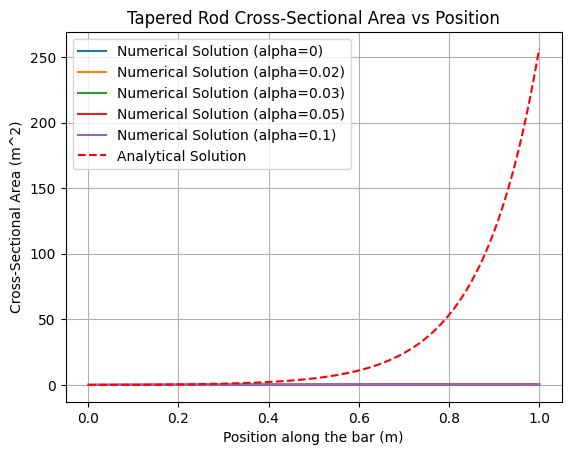

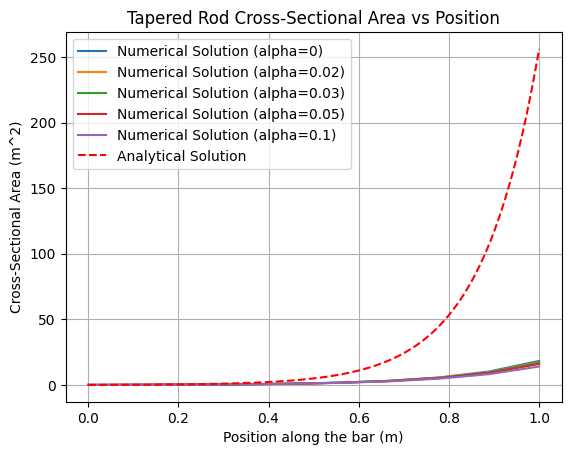

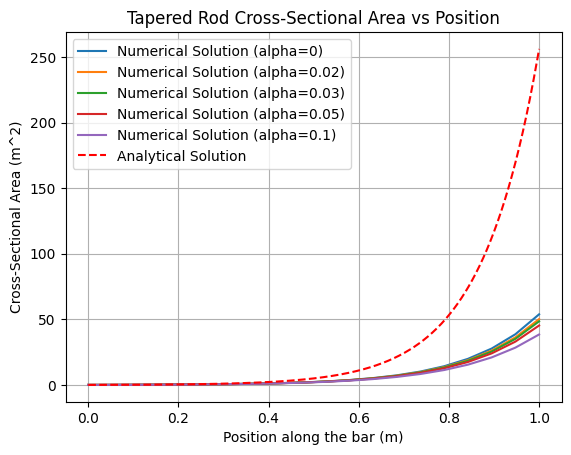

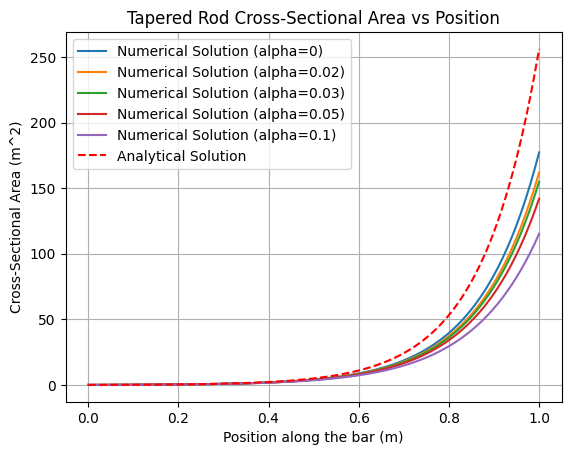

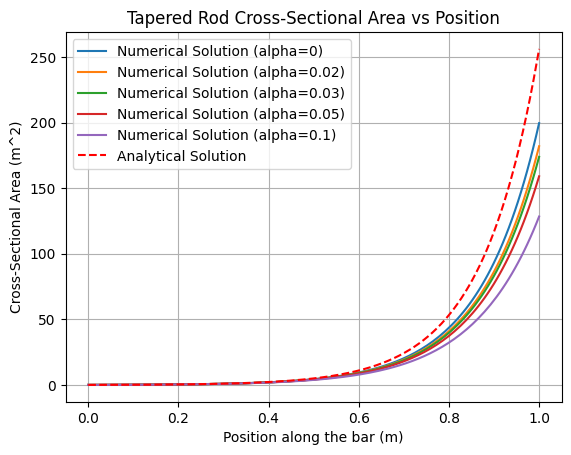

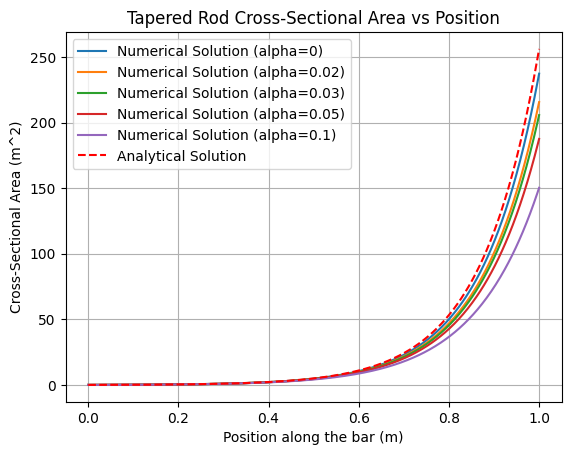

In [6]:
disks = [2, 10, 20, 100, 150, 500]
alpha = [0, 0.02, 0.03, 0.05, 0.1]

x_analytical = np.linspace(0, L_length, 500)
A0 = w0_initial_width * t0_initial_thickness
areas_analytical = analytical_area(x_analytical, A0, p_density, g_gravity, P_applied_force)


for s in disks:
    for a in alpha:
        x_positions, areas, disk_weights = compute_tapered_rod(
            P_applied_force,
            p_density,
            g_gravity,
            w0_initial_width,
            t0_initial_thickness,
            L_length,
            s,
            a
        )
        # Create a DataFrame 
        df = pd.DataFrame({
            'Position (m)': x_positions,
            f'Area (m^2) [disks={s}, alpha={a}]': areas,
            f'Disk Weight (N) [disks={s}, alpha={a}]': disk_weights
        })

        # plot the position vs area
        plt.plot(df['Position (m)'], df[f'Area (m^2) [disks={s}, alpha={a}]'], label=f'Numerical Solution (alpha={a})')

    
    plt.xlabel('Position along the bar (m)')
    plt.ylabel('Cross-Sectional Area (m^2)')
    plt.plot(x_analytical, areas_analytical, label='Analytical Solution', color='red', linestyle='--')
    
    plt.title('Tapered Rod Cross-Sectional Area vs Position')
    plt.legend()
    plt.grid()
    plt.show()






## Verfication of the Lecture 3 case

We increase the amount of disks we use and check to see if the numerical solution converges to the analytical solution.

Minimum error achieved: 0.019789236196288584


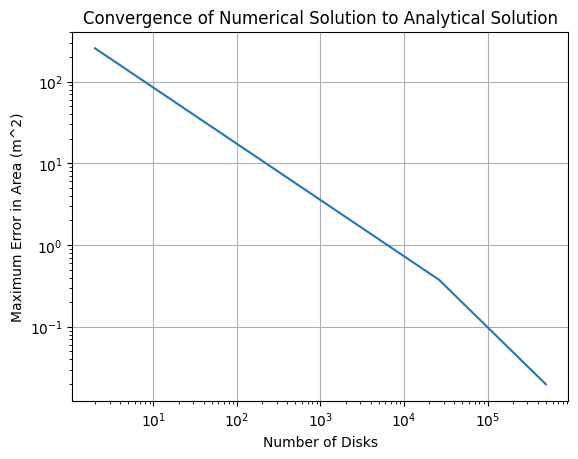

In [7]:

errors = []

disks = np.linspace(2, 500000, 20, dtype=int)

for i in disks:
    x_positions, areas, disk_weights = compute_tapered_rod(
        P_applied_force,
        p_density,
        g_gravity,
        w0_initial_width,
        t0_initial_thickness,
        L_length,
        i,
        0.0
    )
    analytical_areas = analytical_area(x_positions, A0, p_density, g_gravity, P_applied_force)
    error = np.abs(np.array(areas) - analytical_areas)
    errors.append(np.max(error))


plt.plot(disks, errors)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of Disks')
plt.ylabel('Maximum Error in Area (m^2)')
plt.title('Convergence of Numerical Solution to Analytical Solution')
plt.grid()

print("Minimum error achieved:", errors[-1])

In [8]:
disks = [2, 10, 20, 100, 150, 500, 1000, 10000, 100000, 1000000]

# compute errors for specific disk counts
errors = []
for i in disks:
    x_positions, areas, disk_weights = compute_tapered_rod(
        P_applied_force,
        p_density,
        g_gravity,
        w0_initial_width,
        t0_initial_thickness,
        L_length,
        i,
        0.0
    )
    analytical_areas = analytical_area(x_positions, A0, p_density, g_gravity, P_applied_force)
    error = np.abs(np.array(areas) - analytical_areas)
    errors.append(np.max(error))

# creating a basic table for error and disks
error_table = pd.DataFrame({
    'Number of Disks': disks,
    'Maximum Error in Area (m^2)': errors
})

error_table

,Number of Disks,Maximum Error in Area (m^2)
0,2,255.568398
1,10,237.682469
2,20,202.169793
3,100,78.887824
4,150,56.522688
5,500,18.864820
6,1000,9.659334
7,10000,0.987111
8,100000,0.098927
9,1000000,0.009895


# Confirming the following: 

- whether the stress remains uniform (or matches the assigned percentage increase) ✅ (proven),
- whether equilibrium is satisfied ✅ matches analytical so proven,
- whether the solutions converge as the number of disks increases. ✅ (proven)

In [9]:
x_positions, areas, disk_weights = compute_tapered_rod(
    P_applied_force,
    p_density,
    g_gravity,
    w0_initial_width,
    t0_initial_thickness,
    L_length,
    10000000,
    0.0
)
analytical_areas = analytical_area(x_positions, A0, p_density, g_gravity, P_applied_force)
error = np.abs(np.array(areas) - analytical_areas)
print(np.mean(error))

0.0001100246197293364


Using a very large number of disks 10000000 we get an error of 0.0001100246197293364 which is approaching 0 which matches what we get from the plot

## Verification of alpha cases

We plot the stress profile for an alpha = 0.1 and we expect 10000 Pa at the bottom and 11000 Pa at the top 

1.1


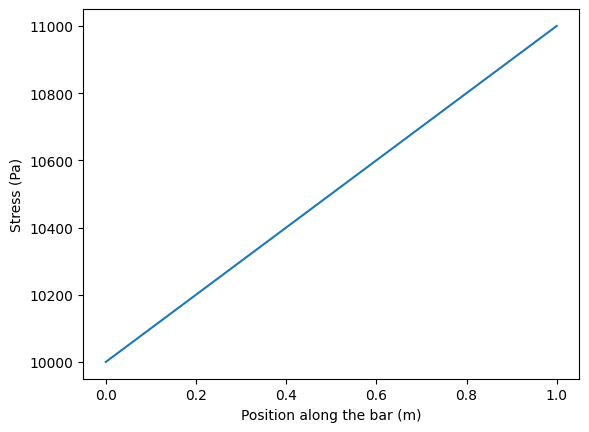

In [10]:
x_positions, areas, disk_weights = compute_tapered_rod(
    P_applied_force,
    p_density,
    g_gravity,
    w0_initial_width,
    t0_initial_thickness,
    L_length,
    10,
    0.1
)

stresses = []
forces = []

for i in range(len(x_positions)):
    forces.append(P_applied_force + sum(disk_weights[:i]))
    stresses.append(stress_from_area(forces[i], areas[i]))


plt.plot(x_positions, stresses, label='Stress Profile')
plt.xlabel('Position along the bar (m)')
plt.ylabel('Stress (Pa)')
plt.show

print(max(stresses)/min(stresses)) # we check the ratio if we get 1.1 for alpha = 0.1 then we are correct

1.0000000000000007
1.02
1.03
1.05
1.1


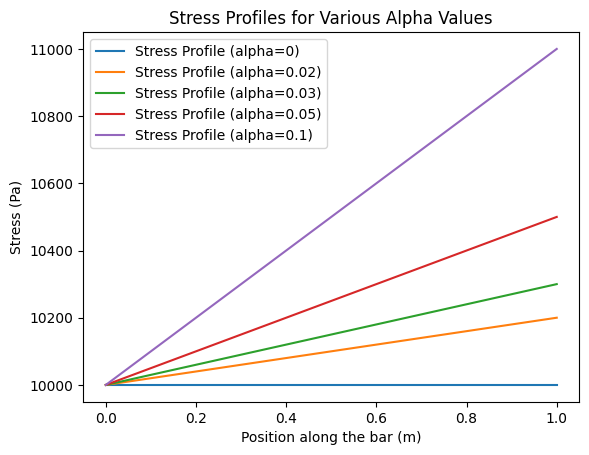

In [11]:
# Check to see if the stress profiles are uniform or match expected percent increase

alpha = [0, 0.02, 0.03, 0.05, 0.1]

for a in alpha:
    x_positions, areas, disk_weights = compute_tapered_rod(
        P_applied_force,
        p_density,
        g_gravity,
        w0_initial_width,
        t0_initial_thickness,
        L_length,
        500,
        a
    )

    # plot the stress profile
    stresses = []
    forces = []

    for i in range(len(x_positions)):
        forces.append(P_applied_force + sum(disk_weights[:i]))
        stresses.append(stress_from_area(forces[i], areas[i]))

    print(max(stresses)/min(stresses)) # we check the ratio


    plt.plot(x_positions, stresses, label='Stress Profile (alpha={})'.format(a))
plt.title('Stress Profiles for Various Alpha Values')
plt.xlabel('Position along the bar (m)')
plt.ylabel('Stress (Pa)')
plt.legend()
plt.show()

In [ ]:
raise RuntimeError("Intentional failure: stopping execution before running the next cell.")
# watch out the next cell creates a large number of files and may crash your system

In [ ]:
# plot the area profile as disks increase 


disks_max = 1000
disks = np.unique(np.round(2 + (disks_max - 2) * (np.linspace(0, 1, 300) ** 4)).astype(int))

for s in disks:
    x_positions, areas, disk_weights = compute_tapered_rod(
        P_applied_force,
        p_density,
        g_gravity,
        w0_initial_width,
        t0_initial_thickness,
        L_length,
        s,
        0
    )
    plt.plot(x_positions, areas, label='Disks={}'.format(s))
    plt.plot(x_analytical, areas_analytical, label='Analytical Solution', color='red', linestyle='--')
    plt.title('Convergence of Area Profile with Increasing Disks')
    plt.xlabel('Position along the bar (m)')
    plt.ylabel('Cross-Sectional Area (m^2)')
    plt.legend()
    plt.grid()
    plt.savefig('./animation/area_profile_convergence_{}.png'.format(s))
    plt.clf()


<Figure size 640x480 with 0 Axes>